In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/SEMANTIX/"

In [4]:
# Importação dos dados
df = pd.read_csv(path+"MICRODADOS_ENEM_2021.csv", sep=";")#, encoding_errors='ignore')
df.shape

(1885722, 77)

In [5]:
df.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [6]:
# Seleção de variáveis não equivalentes. 
# Algumas variáveis são equivalentes, como por exemplo nome e código da cidade, representando o mesmo parâmetro: cidade.
# Foram selecionada as colunas com variáveis distintas. 

columns = ['NO_MUNICIPIO_ESC',
           'SG_UF_ESC',
           'TP_LOCALIZACAO_ESC',
           'TP_DEPENDENCIA_ADM_ESC',
           'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 
           'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 
           'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 
           'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 
           'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
           'NU_NOTA_CN',
           'NU_NOTA_CH',
           'NU_NOTA_LC',
           'NU_NOTA_MT',
           'NU_NOTA_REDACAO',
           ] 
df = df[columns]
df.head(5)

,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,TP_DEPENDENCIA_ADM_ESC,Q001,Q002,Q003,Q004,Q005,Q006,...,Q021,Q022,Q023,Q024,Q025,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,F,F,B,B,3.0,D,...,A,B,A,B,B,NaN,574.6,472.6,NaN,760.0
1,NaN,NaN,NaN,NaN,B,B,B,B,3.0,B,...,A,C,A,A,A,505.9,551.8,498.3,461.5,560.0
2,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,...,A,C,B,B,B,NaN,NaN,NaN,NaN,NaN
3,Crato,CE,1.0,2.0,B,B,B,B,6.0,B,...,A,B,A,B,B,580.7,678.9,638.9,659.5,780.0
4,Redeno,CE,1.0,2.0,D,E,F,D,4.0,C,...,B,E,A,B,B,497.7,532.4,457.6,582.6,780.0


In [7]:
# Removendo linhas completamente nulas
df = df.dropna(axis=0,how='all')
df.shape

(1885722, 34)

In [8]:
# Quantidade de valores nulos por variável
for column in df.columns:
  count_na = df[column].isna().sum()
  print(column, count_na)

NO_MUNICIPIO_ESC 1358651
SG_UF_ESC 1358651
TP_LOCALIZACAO_ESC 1358651
TP_DEPENDENCIA_ADM_ESC 1358651
Q001 1
Q002 1
Q003 1
Q004 2
Q005 2
Q006 2
Q007 2
Q008 2
Q009 2
Q010 2
Q011 2
Q012 2
Q013 2
Q014 2
Q015 2
Q016 2
Q017 2
Q018 2
Q019 2
Q020 2
Q021 2
Q022 2
Q023 2
Q024 2
Q025 2
NU_NOTA_CN 494953
NU_NOTA_CH 426835
NU_NOTA_LC 426835
NU_NOTA_MT 494953
NU_NOTA_REDACAO 426835


# Medidas totais

## Medidas resumo (variáveis quantitativas)

In [9]:
# Média notas 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
columns = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
df[columns].mean(axis=0)

NU_NOTA_CN        492.64
NU_NOTA_CH        522.04
NU_NOTA_LC        503.59
NU_NOTA_MT        536.94
NU_NOTA_REDACAO   629.73
dtype: float64

In [10]:
# Média, desvio, mínimo, quantis (25%, 50%, 75%), máximo
df[columns].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,1390769.00,1458887.00,1458887.00,1390769.00,1458887.00
mean,492.64,522.04,503.59,536.94,629.73
std,82.24,96.00,79.58,111.99,190.99
min,0.00,0.00,0.00,0.00,0.00
25%,430.50,447.30,448.20,445.20,540.00
50%,481.40,523.60,506.50,515.90,620.00
75%,547.20,591.30,559.90,616.30,760.00
max,867.10,846.90,826.10,953.10,1000.00


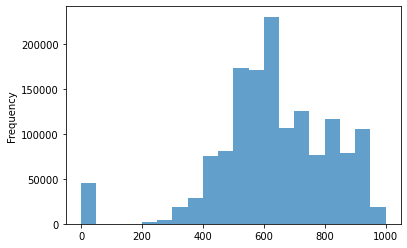

In [ ]:
# Distribuição notas
# Redação
ax = df['NU_NOTA_REDACAO'].plot.hist(bins=20, alpha=0.7)

## Avaliação das notas em relação a administração das escolas.

In [11]:
adm_dict = {1:'Federal',
            2:'Estadual', 
            3:'Municipal',
            4:'Privada'}
df = df.replace({"TP_DEPENDENCIA_ADM_ESC":adm_dict})#, inplace=True)
df.head(2)

,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,TP_DEPENDENCIA_ADM_ESC,Q001,Q002,Q003,Q004,Q005,Q006,...,Q021,Q022,Q023,Q024,Q025,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,F,F,B,B,3.00,D,...,A,B,A,B,B,NaN,574.60,472.60,NaN,760.00
1,NaN,NaN,NaN,NaN,B,B,B,B,3.00,B,...,A,C,A,A,A,505.90,551.80,498.30,461.50,560.00


In [12]:
#Divisão da notas por bins 
df['NU_NOTA_REDACAO_bin'] = pd.cut(df.NU_NOTA_REDACAO, bins = [0,200,400,600,800,1000])#500,600,700,800,900,1000])
df.head(3)

,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,TP_DEPENDENCIA_ADM_ESC,Q001,Q002,Q003,Q004,Q005,Q006,...,Q022,Q023,Q024,Q025,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_REDACAO_bin
0,NaN,NaN,NaN,NaN,F,F,B,B,3.00,D,...,B,A,B,B,NaN,574.60,472.60,NaN,760.00,"(600.0, 800.0]"
1,NaN,NaN,NaN,NaN,B,B,B,B,3.00,B,...,C,A,A,A,505.90,551.80,498.30,461.50,560.00,"(400.0, 600.0]"
2,NaN,NaN,NaN,NaN,B,C,C,B,3.00,C,...,C,B,B,B,NaN,NaN,NaN,NaN,NaN,NaN


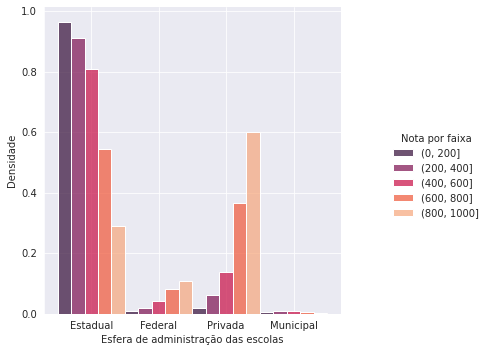

In [27]:
sns.set_style("darkgrid")
fig = sns.displot(df, x="TP_DEPENDENCIA_ADM_ESC", hue="NU_NOTA_REDACAO_bin", 
            stat="density", common_norm=False,  multiple="dodge", element="bars",
            palette="rocket")

fig._legend.set_title("Nota por faixa")
fig.set(xlabel='Esfera de administração das escolas', ylabel="Densidade")

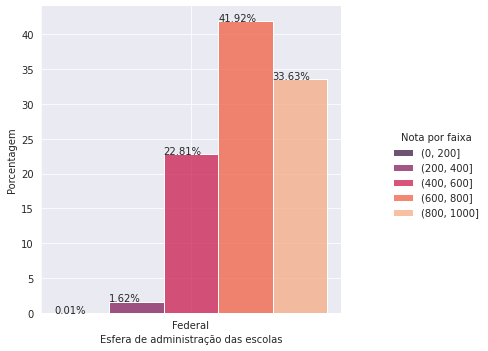

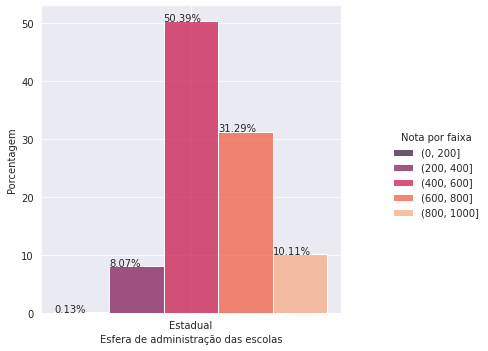

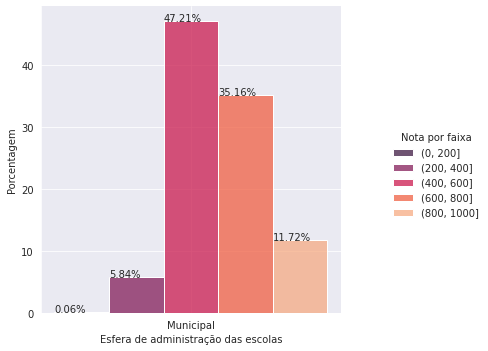

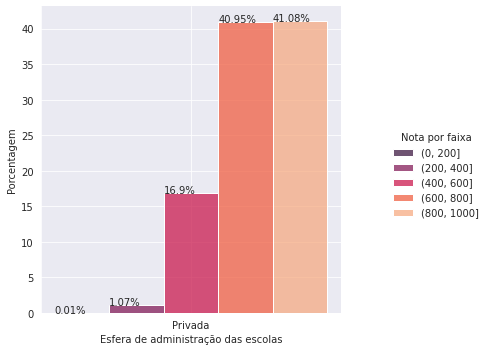

In [28]:
from matplotlib import pyplot as plt
sns.set_style("darkgrid")

adm_list = ["Federal","Estadual","Municipal","Privada"]

for adm in adm_list:
  fig = sns.displot(df[df["TP_DEPENDENCIA_ADM_ESC"]==adm], x="TP_DEPENDENCIA_ADM_ESC", hue="NU_NOTA_REDACAO_bin", 
              stat="percent",  multiple="dodge", element="bars",
              palette="rocket")
  fig._legend.set_title("Nota por faixa")
  fig.ax.set(xlabel='Esfera de administração das escolas', ylabel="Porcentagem")

  for p in fig.ax.patches:
      txt = str(p.get_height().round(2)) + '%'
      txt_x = p.get_x() 
      txt_y = p.get_height()
      fig.ax.text(txt_x,txt_y,txt)

  fig.savefig(adm+'.png')
 

  
  

  

## Avaliação das notas em relação a região geográfica.

In [33]:
adm_dict = {2:'Rural',
            1:'Urbana'
            }
df = df.replace({"TP_LOCALIZACAO_ESC":adm_dict})#, inplace=True)
df.head(2)

,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,TP_DEPENDENCIA_ADM_ESC,Q001,Q002,Q003,Q004,Q005,Q006,...,Q022,Q023,Q024,Q025,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_REDACAO_bin
0,NaN,NaN,NaN,NaN,F,F,B,B,3.00,D,...,B,A,B,B,NaN,574.60,472.60,NaN,760.00,"(600, 800]"
1,NaN,NaN,NaN,NaN,B,B,B,B,3.00,B,...,C,A,A,A,505.90,551.80,498.30,461.50,560.00,"(400, 600]"


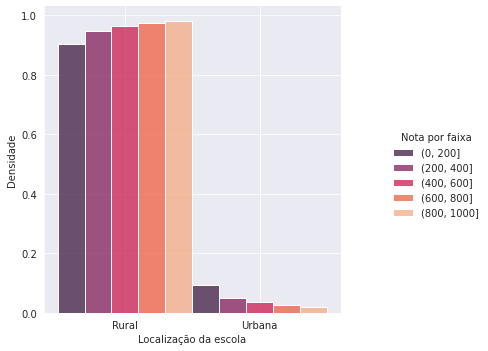

In [34]:
sns.set_style("darkgrid")
fig = sns.displot(df, x="TP_LOCALIZACAO_ESC", hue="NU_NOTA_REDACAO_bin", 
            stat="density", common_norm=False,  multiple="dodge", element="bars",
            palette="rocket")

fig._legend.set_title("Nota por faixa")
fig.set(xlabel='Localização da escola', ylabel="Densidade")

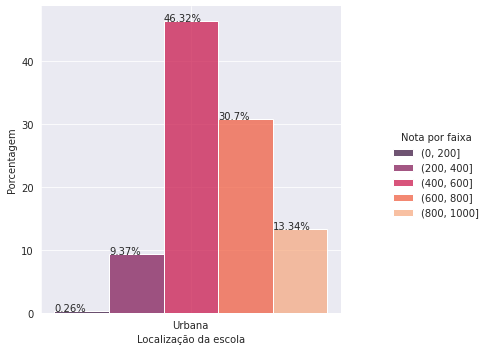

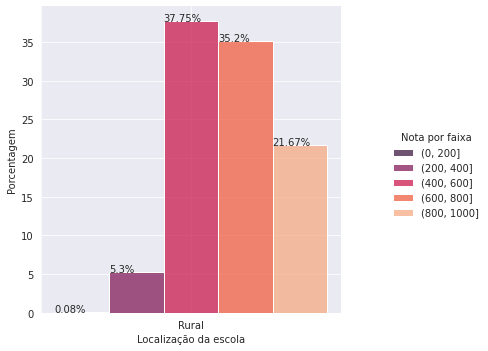

In [38]:
from matplotlib import pyplot as plt
sns.set_style("darkgrid")

label_list = ["Urbana","Rural"]

for label in label_list:
  fig = sns.displot(df[df["TP_LOCALIZACAO_ESC"]==label], x="TP_LOCALIZACAO_ESC", hue="NU_NOTA_REDACAO_bin", 
              stat="percent",  multiple="dodge", element="bars",
              palette="rocket")
  fig._legend.set_title("Nota por faixa")
  fig.ax.set(xlabel='Localização da escola', ylabel="Porcentagem")

  for p in fig.ax.patches:
      txt = str(p.get_height().round(2)) + '%'
      txt_x = p.get_x() 
      txt_y = p.get_height()
      fig.ax.text(txt_x,txt_y,txt)

  fig.savefig(adm+'.png')